In [2]:
import yfinance as yf
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
data = pd.read_csv('individual_bank_data_nse.csv', parse_dates=['Date'])

In [23]:
data.head()

,Index Name,Date,Open,High,Low,Close
0,HDFC Bank,2023-01-02,1622.050049,1639.000000,1618.650024,1629.150024
1,HDFC Bank,2023-01-03,1624.550049,1643.599976,1624.550049,1639.699951
2,HDFC Bank,2023-01-04,1635.000000,1645.750000,1607.449951,1610.550049
3,HDFC Bank,2023-01-05,1614.300049,1618.199951,1590.000000,1599.699951
4,HDFC Bank,2023-01-06,1599.750000,1608.900024,1578.500000,1594.349976


In [24]:
data.describe()

,Date,Open,High,Low,Close
count,2760,2760.000000,2760.000000,2760.000000,2760.000000
mean,2023-06-30 11:53:44.347826176,713.186311,719.292042,706.165200,712.836036
min,2023-01-02 00:00:00,44.759998,45.750000,44.410000,44.919998
25%,2023-03-24 00:00:00,156.950001,158.987499,153.724998,156.312496
50%,2023-06-22 12:00:00,605.875000,611.450012,599.174988,605.225006
75%,2023-10-05 00:00:00,1076.424957,1089.425018,1058.125000,1075.075043
max,2023-12-29 00:00:00,1980.949951,2063.000000,1955.000000,1994.599976
std,NaN,590.505681,594.732548,585.637656,590.290765


<h3>Volume<h3>

<h4>Outliers<h4>

In [37]:
# Calculate Z-scores
col = 'Close'
data['Z-Score'] = (data[col] - data[col].mean()) / data[col].std()

# Identify outliers
threshold = 3
outliers = data[np.abs(data['Z-Score']) > threshold]
outliers

,Index Name,Date,Open,High,Low,Close,Z-Score


In [38]:
sorted_volume = data[col].sort_values(ascending=True)
pd.set_option('display.max_rows', None)
print(sorted_volume.head(10))

1439    44.919998
1437    45.570000
1438    45.599998
1440    46.209999
1443    46.689999
1441    46.709999
1436    46.869999
1433    46.939999
1445    47.049999
1447    47.080002
Name: Close, dtype: float64


In [39]:
sorted_volume = data[col].sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print(sorted_volume.head(10))

1018    1994.599976
1017    1973.550049
1008    1973.050049
1046    1971.099976
1022    1960.900024
1003    1960.500000
1005    1959.949951
1007    1959.750000
1006    1958.050049
1045    1957.400024
Name: Close, dtype: float64


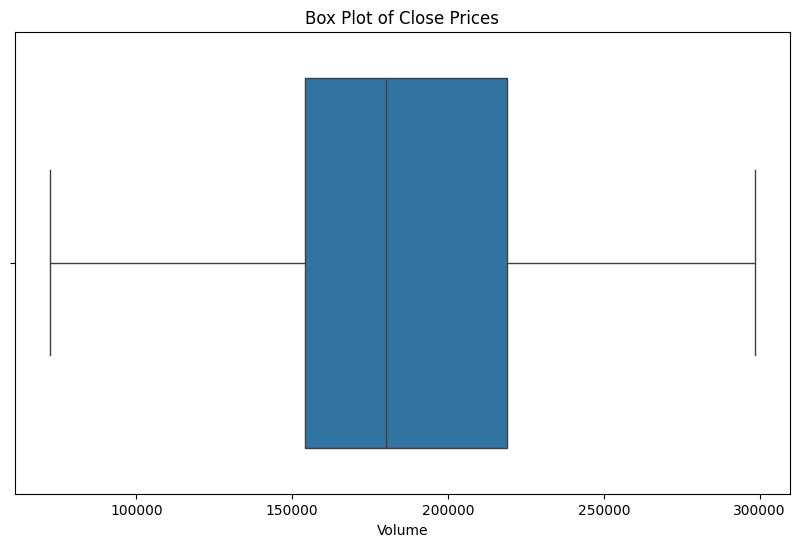

In [92]:



plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_df['Volume'])
plt.title('Box Plot of Close Prices')
plt.show()


In [5]:
# Assuming your DataFrame is named df and the volume column is 'Volume'
df = pd.read_csv('nifty_bank_index.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)
max_expected_volume = 700000  # Define a threshold for realistic volume values
min_expected_volume = 10  # Define a threshold for realistic volume values
cleaned_df = df[(df['Volume'] < max_expected_volume) & (df['Volume'] > min_expected_volume)]
highest_volume = cleaned_df['Volume'].max()
print("Highest volume after cleaning:", highest_volume)


Highest volume after cleaning: 463000


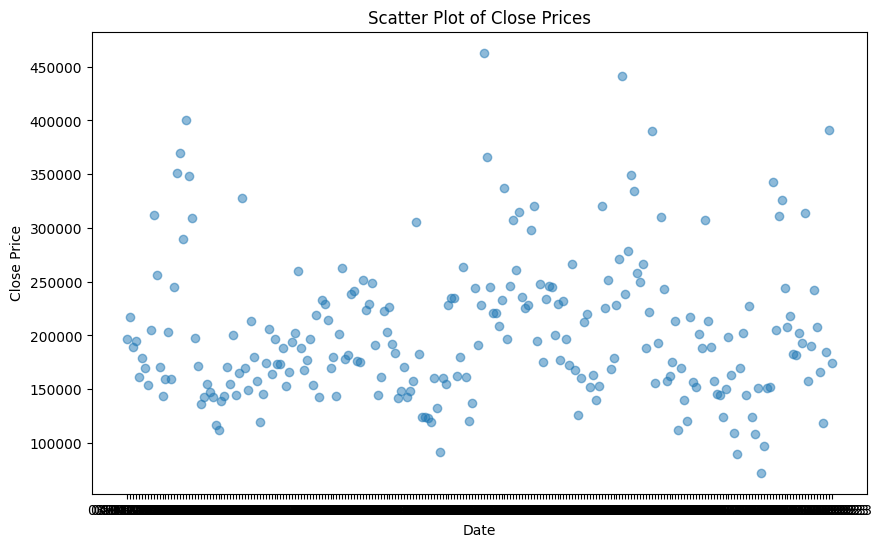

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df.index, cleaned_df['Volume'], alpha=0.5)
plt.title('Scatter Plot of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


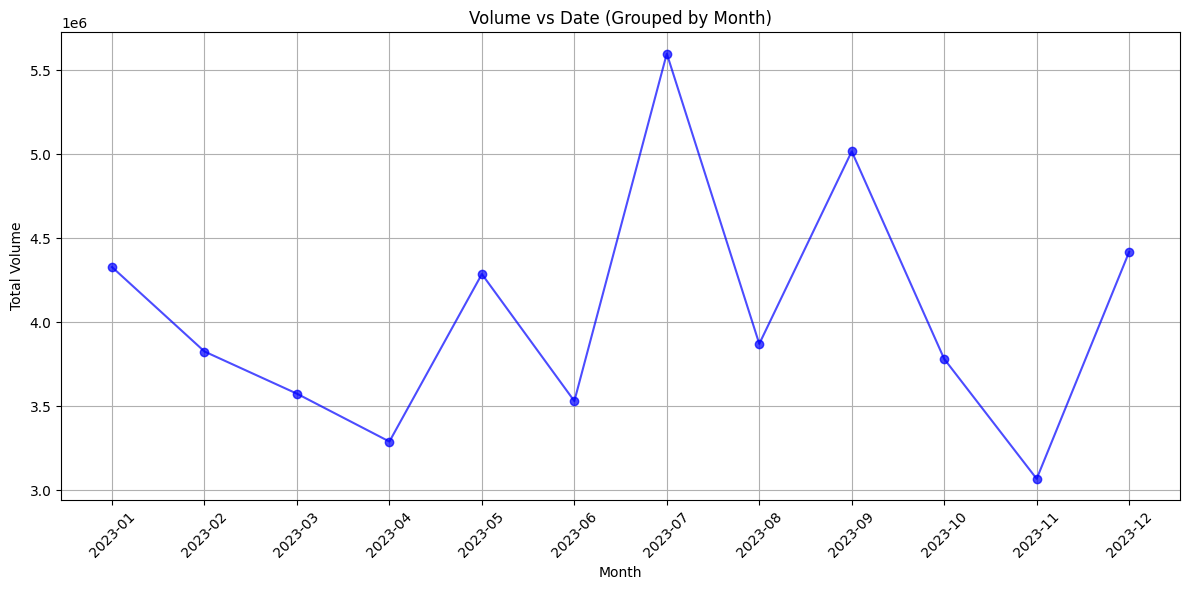

In [23]:
# Load the data from CSV
df = pd.read_csv('nifty_bank_index.csv')
df = df[(df['Volume'] < max_expected_volume) & (df['Volume'] > min_expected_volume)]
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.to_period('M')

# Group by month and aggregate volume (sum for each month)
monthly_data = df.groupby('Month')['Volume'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'].astype(str), monthly_data['Volume'], color='blue', marker='o', linestyle='-', alpha=0.7)
plt.title('Volume vs Date (Grouped by Month)')
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


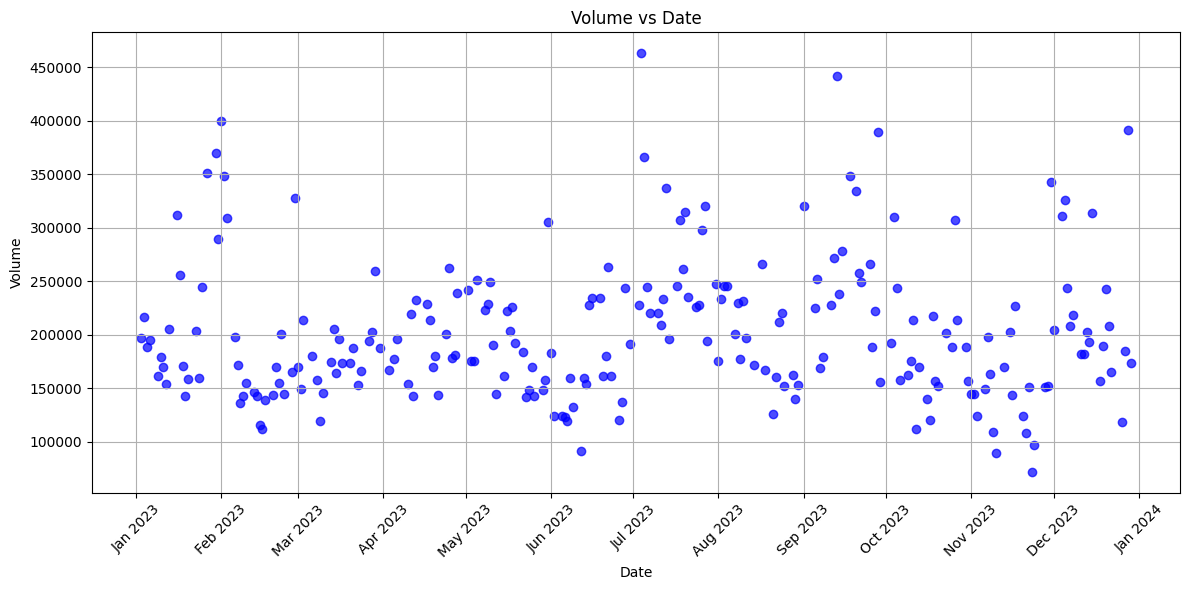

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV
df = pd.read_csv('nifty_bank_index.csv')
df = df[(df['Volume'] < max_expected_volume) & (df['Volume'] > min_expected_volume)]
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Volume'], color='blue', alpha=0.7)
plt.title('Volume vs Date')
plt.xlabel('Date')
plt.ylabel('Volume')

# Format the x-axis to show months
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


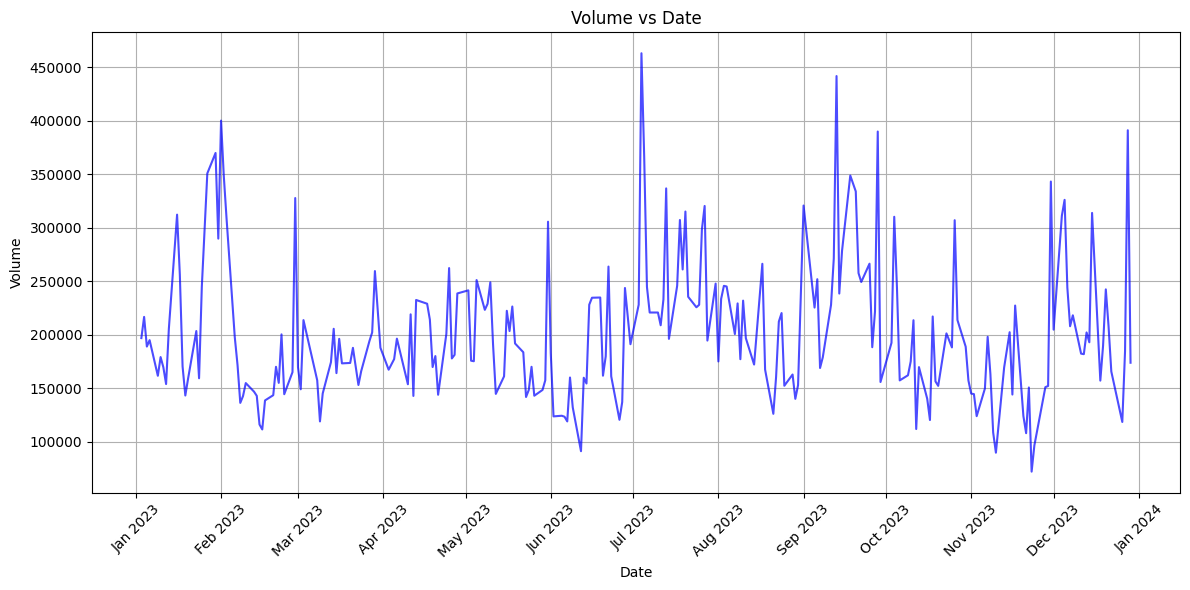

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV
df = pd.read_csv('nifty_bank_index.csv')
df = df[(df['Volume'] < max_expected_volume) & (df['Volume'] > min_expected_volume)]
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort the DataFrame by date to ensure the line graph is plotted correctly
df = df.sort_values('Date')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], color='blue', marker='', linestyle='-', alpha=0.7)
plt.title('Volume vs Date')
plt.xlabel('Date')
plt.ylabel('Volume')

# Format the x-axis to show months
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:


# Calculate Z-scores
data['Z-Score'] = (data['Volume'] - data['Volume'].mean()) / data['Volume'].std()

# Identify outliers
threshold = 2
outliers = data[np.abs(data['Z-Score']) > threshold]

print("Outliers based on Z-Score:")
print(outliers)

In [74]:
sorted_volume = data['Close'].sort_values(ascending=True)
pd.set_option('display.max_rows', None)
print(sorted_volume.head(200))

Date
15-03-2023    39051.50000
16-03-2023    39132.60156
20-03-2023    39361.94922
24-03-2023    39395.35156
14-03-2023    39411.39844
27-03-2023    39431.30078
13-03-2023    39564.69922
28-03-2023    39567.89844
17-03-2023    39598.10156
23-03-2023    39616.89844
21-03-2023    39894.69922
24-02-2023    39909.39844
29-03-2023    39910.14844
22-02-2023    39995.89844
22-03-2023    39999.05078
23-02-2023    40001.55078
28-02-2023    40269.05078
27-02-2023    40307.10156
27-01-2023    40345.30078
30-01-2023    40387.44922
02-03-2023    40389.80078
10-03-2023    40485.44922
01-02-2023    40513.00000
31-03-2023    40608.64844
31-01-2023    40655.05078
02-02-2023    40669.30078
21-02-2023    40673.60156
01-03-2023    40698.14844
20-02-2023    40701.69922
03-04-2023    40813.05078
10-04-2023    40834.64844
05-04-2023    40999.14844
06-04-2023    41041.00000
17-02-2023    41131.75000
03-03-2023    41251.35156
09-03-2023    41256.75000
13-02-2023    41282.19922
06-03-2023    41350.39844
11-04-2

In [78]:
sorted_volume = data['Volume'].sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print(sorted_volume.head(200))

Date
02-01-2023    1798102100
31-08-2023        705100
04-07-2023        463000
13-09-2023        441700
01-02-2023        400100
28-12-2023        391100
28-09-2023        389900
30-01-2023        369900
05-07-2023        366300
27-01-2023        350800
18-09-2023        348800
02-02-2023        348500
30-11-2023        343200
13-07-2023        336800
20-09-2023        334000
28-02-2023        327800
05-12-2023        326100
01-09-2023        320800
27-07-2023        320400
20-07-2023        315200
15-12-2023        313900
16-01-2023        312300
04-12-2023        311200
04-10-2023        310300
03-02-2023        308800
18-07-2023        307300
26-10-2023        307100
31-05-2023        305700
26-07-2023        298400
31-01-2023        289900
15-09-2023        278400
12-09-2023        271400
25-09-2023        266500
17-08-2023        266400
22-06-2023        263800
25-04-2023        262400
19-07-2023        261100
29-03-2023        259600
21-09-2023        257700
17-01-2023        25